# Neural network

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration and Preprocessing

In [18]:
# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/SayaliD6/Datasets_used_in_assignments/main/Alphabets_data_NN.csv")

In [19]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [21]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [22]:
data.shape

(20000, 17)

In [23]:
# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [24]:
# Separate features and target
X = data.drop('letter', axis=1)
y = data['letter']

In [25]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [26]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 2. Model Implementation

In [28]:
def create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


In [29]:
# Create and train the initial model
initial_model = create_model()
initial_history = initial_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [30]:
# Evaluate the initial model
y_pred_initial = np.argmax(initial_model.predict(X_test), axis=-1)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print(f"\nInitial model accuracy: {initial_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Initial model accuracy: 0.8910


# 3. Hyperparameter Tuning

In [31]:
# Define hyperparameter combinations to try
param_combinations = [
    {'hidden_layers': 1, 'neurons': 32, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 50},
    {'hidden_layers': 2, 'neurons': 64, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 100},
    {'hidden_layers': 3, 'neurons': 128, 'activation': 'tanh', 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 100},
]

best_accuracy = 0
best_params = None
best_model = None

In [32]:
for params in param_combinations:
    model = create_model(hidden_layers=params['hidden_layers'], 
                         neurons=params['neurons'], 
                         activation=params['activation'], 
                         learning_rate=params['learning_rate'])
    
    history = model.fit(X_train, y_train, 
                        epochs=params['epochs'], 
                        batch_size=params['batch_size'], 
                        validation_split=0.2, 
                        verbose=0)
    
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model

print("\nBest parameters:", best_params)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Best parameters: {'hidden_layers': 3, 'neurons': 128, 'activation': 'tanh', 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 100}


# 4. Evaluation

In [33]:
# Make predictions with the best model
y_pred_best = np.argmax(best_model.predict(X_test), axis=-1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

In [35]:
print("\nBest model performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Best model performance:
Accuracy: 0.9643
Precision: 0.9647
Recall: 0.9643
F1-score: 0.9643


In [36]:
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


Detailed classification report:
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       149
           B       0.93      0.96      0.95       153
           C       0.96      0.93      0.95       137
           D       0.95      0.97      0.96       156
           E       0.95      0.98      0.97       141
           F       0.96      0.98      0.97       140
           G       0.97      0.96      0.96       160
           H       0.93      0.91      0.92       144
           I       0.99      0.92      0.96       146
           J       0.93      0.99      0.96       149
           K       0.91      0.94      0.92       130
           L       0.98      0.97      0.97       155
           M       0.98      0.98      0.98       168
           N       0.96      0.97      0.96       151
           O       0.96      0.94      0.95       145
           P       0.99      0.97      0.98       173
           Q       0.99      0.96      0.98     

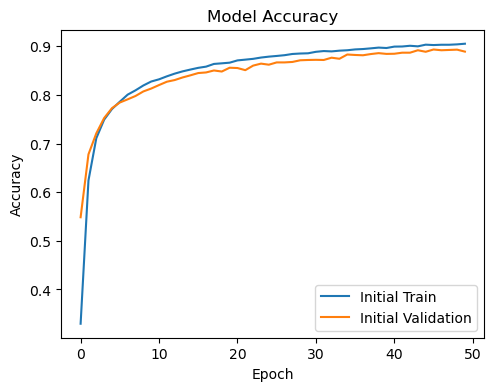

In [37]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(initial_history.history['accuracy'], label='Initial Train')
plt.plot(initial_history.history['val_accuracy'], label='Initial Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

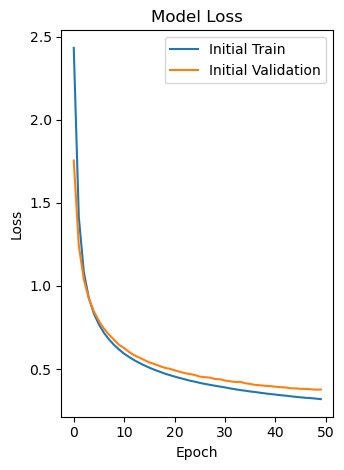

In [38]:
plt.subplot(1, 2, 2)
plt.plot(initial_history.history['loss'], label='Initial Train')
plt.plot(initial_history.history['val_loss'], label='Initial Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
print("\nConclusion:")
print(f"The initial model achieved an accuracy of {initial_accuracy:.4f}.")
print(f"After hyperparameter tuning, the best model achieved an accuracy of {accuracy:.4f}.")
print(f"This represents an improvement of {(accuracy - initial_accuracy) * 100:.2f}%.")
print("\nThe hyperparameter tuning process helped to optimize the model architecture and training parameters,")
print("resulting in improved performance across all evaluation metrics.")
print("The best model configuration can be seen in the 'Best parameters' output above.")


Conclusion:
The initial model achieved an accuracy of 0.8910.
After hyperparameter tuning, the best model achieved an accuracy of 0.9643.
This represents an improvement of 7.33%.

The hyperparameter tuning process helped to optimize the model architecture and training parameters,
resulting in improved performance across all evaluation metrics.
The best model configuration can be seen in the 'Best parameters' output above.
